## Libraries and settings

In [2]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/applied_research_methods/Week_04


### Import Data

In [3]:
df = pd.read_csv('./Data/supermarkets_data_enriched.csv')[['id', 'brand', 'lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']]

df.head(5)

,id,brand,lat,lon,pop,pop_dens,frg_pct,emp
0,33126515,Spar,47.155616,9.037915,3876,97.142857,13.054696,1408.0
1,280130028,ALDI,47.155492,9.039666,3876,97.142857,13.054696,1408.0
2,6122906632,Denner,47.158959,9.044477,3876,97.142857,13.054696,1408.0
3,9019298862,Lidl,47.155185,9.038472,3876,97.142857,13.054696,1408.0
4,36726161,Migros,47.226191,8.980329,6489,860.610080,27.862537,3500.0


### Count supermarkets per brand

In [4]:
# Different spellings -> same brand -> unify
df['brand'] = df['brand'].str.upper()

brand_counts = df.groupby('brand').size().reset_index(name='count')
print(brand_counts)

                                    brand  count
0                                7-ELEVEN      1
1                                    ALDI    124
2                             ALDI SUISSE      1
3                                ALNATURA     15
4                                    AVEC      1
5                                    COOP    498
6                                    CRAI      2
7                                  DENNER    423
8                           DENNER;MIGROS      1
9                                EUROSPAR      1
10                                   GAZI      1
11                                 GLOBUS      2
12                                  JUMBO      2
13                                  LANDI     39
14                                   LIDL     58
15                           LIDL SCHWEIZ      1
16                                 MIGROS    495
17                          MIGROS-OUTLET     12
18                                    PAM      4
19                  

### Barchart 

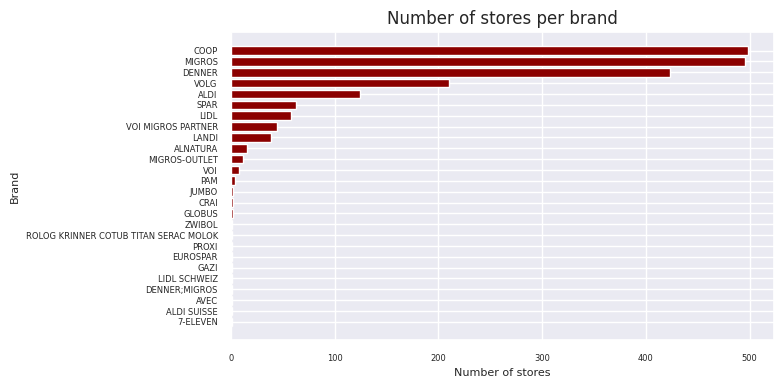

In [37]:
# Group data by brand 
df_bar = brand_counts.sort_values(by='count', ascending=True)

# Values for barchart
napart = list(df_bar['count'])
index = list(df_bar['brand'])
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7, 4))
ax.barh(y_pos, napart, align='center', color='darkred', alpha=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(index, fontsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.set_xlabel('Number of stores', fontsize=8)
ax.set_ylabel('Brand', fontsize=8)
ax.set_title('Number of stores per brand', fontsize=12)


# Show graph
plt.show()

### Scatterplotmatrix

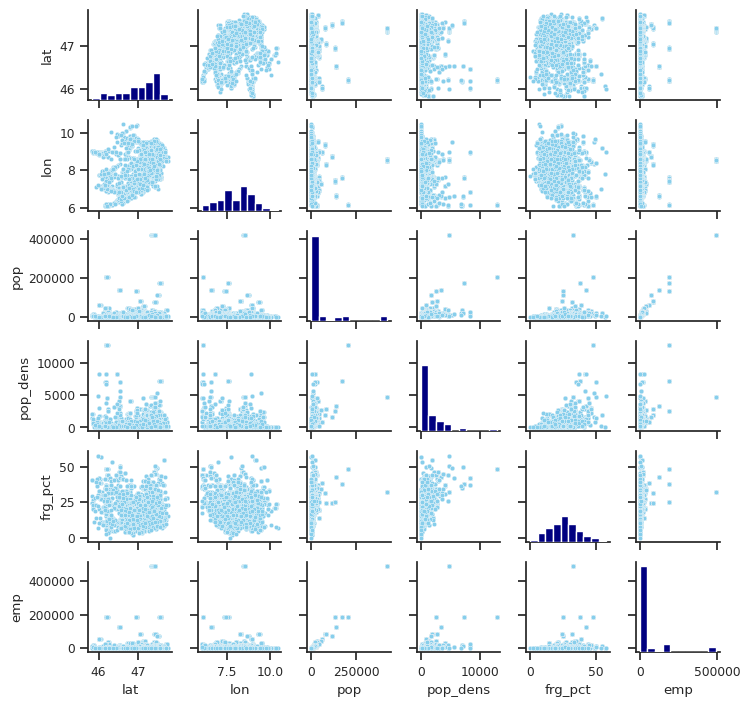

In [38]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['lat', 
                     'lon', 
                     'pop', 
                     'pop_dens',
                     'frg_pct',
                     'emp']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='skyblue', s=10)
g.map_lower(sns.scatterplot, color='skyblue', s=10)
g.map_diag(plt.hist, color='navy')

### Locations of Supermarkets

In [ ]:
df_sub = df.loc[df['brand'].isin(['DENNER', 'VOLG', 'LANDI', 'MIGROS'])]

colors = {'DENNER':'red', 'VOLG':'blue', 'LANDI':'green', 'MIGROS':'orange'}  

# Subset of supermarkets by brand
locations = df_sub[['lat', 'lon', 'brand']]

# Create map
map = folium.Map(location=[locations.lat.mean(), 
                           locations.lon.mean()], 
                 zoom_start=8, 
                 control_scale=True)

# Add maker symbols and Colors
for index, location_info in locations.iterrows():
    folium.Marker([location_info['lat'], 
                   location_info['lon']], 
                   popup=location_info['brand'],
                   icon=folium.Icon(color=colors[location_info['brand']])).add_to(map)

# Plot map
map

          lat       lon   brand
2   47.158959  9.044477  DENNER
4   47.226191  8.980329  MIGROS
6   47.225056  8.970650  DENNER
8   47.375020  8.522895  MIGROS
11  47.344749  8.529981  MIGROS
